<a href="https://colab.research.google.com/github/stephenscki/data_science/blob/master/titanic/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [0]:
from google.colab import files
uploaded = files.upload()


Saving test.csv to test.csv


Uploaded both test.csv and train.csv

In [0]:
x = pd.read_csv('train.csv')
x.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


We can see that the data was successfully loaded. Now we should separate the 'Survived' data from the rest since it is the result.

In [0]:
y = x.pop('Survived')
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

we have to check for any data that may be missing and can impact our training.

In [0]:
x.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We can see that we're missing a decent chunk of data for age, which is probably important while we're missing a lot of data for cabin. If we think about cabin number, it's probably not necessary since only the general location of the cabin is important, which is captured by Pclass data. 

In [0]:
print('Percent of missing "Age" records is {}'.format(((x['Age'].isnull().sum()/x.shape[0])*100)))

Percent of missing "Age" records is 19.865319865319865


We're missing 20% of the age data, which is quite significant. We should add some data by estimating these missing values. The question is, should we use median or mean?

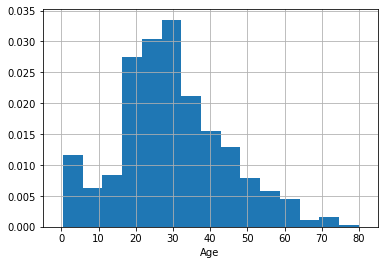

In [0]:
import matplotlib.pyplot as plt

graph = x["Age"].hist(bins=15, density=True, stacked=True)
graph.set(xlabel='Age')
plt.xlim(-5,85)
plt.show()

We can see from the age distribution that the graph is right-skewed where the mean is greater than median. The mean will give us biased results and it's better to use the median, but let's calculate anyway.

In [0]:
print('The mean age is {}'.format(x["Age"].mean()))
print('The median age is {}'.format((x["Age"].median())))

The mean age is 29.69911764705882
The median age is 28.0


Fill the missing ages with the median. Although we're missing embarkment data for 2 people, we can assume that embarkment will have no effect on survival rate.

In [0]:
x_train = x.copy()
x_train["Age"].fillna(x_train["Age"].median(), inplace=True)

Now that we have filled out the missing age data, we need to consider what other features are important. 

In [0]:
categories = x_train[['PassengerId','Pclass','Sex','Age','SibSp','Parch','Fare']]
categories.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,3,male,22.0,1,0,7.2500
1,2,1,female,38.0,1,0,71.2833
2,3,3,female,26.0,0,0,7.9250
3,4,1,female,35.0,1,0,53.1000
4,5,3,male,35.0,0,0,8.0500


We need to convert sex to a numerical value to use some of our classifiers. 

In [0]:
gender_conversion = {'male':0, 'female':1}
categories.Sex=[gender_conversion[item] for item in categories.Sex]
categories.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,3,0,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,3,1,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,3,0,35.0,0,0,8.0500


In [0]:
model=RandomForestClassifier(n_estimators=100)
model.fit(categories,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
print("Train Accuracy :",accuracy_score(y,model.predict(categories)))

Train Accuracy : 1.0


In [0]:
test=pd.read_csv("test.csv")

In [0]:
test[['PassengerId','Pclass','Sex','Age','SibSp','Parch','Fare']].head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,892,3,male,34.5,0,0,7.8292
1,893,3,female,47.0,1,0,7.0000
2,894,2,male,62.0,0,0,9.6875
3,895,3,male,27.0,0,0,8.6625
4,896,3,female,22.0,1,1,12.2875


In [0]:
test["Age"].fillna(test.Age.median(),inplace=True)

In [0]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

We're missing exactly 1 data point for Fare. Let's fill it with the median fare.

In [0]:
test["Fare"].fillna(test["Fare"].median(), inplace=True)

In [0]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

Okay, so we're done filling out missing data. We can try doing the prediction.

In [0]:
test_cols = test[['PassengerId','Pclass','Sex','Age','SibSp','Parch','Fare']]
test_cols.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,892,3,male,34.5,0,0,7.8292
1,893,3,female,47.0,1,0,7.0000
2,894,2,male,62.0,0,0,9.6875
3,895,3,male,27.0,0,0,8.6625
4,896,3,female,22.0,1,1,12.2875


Now, we can't forget to convert the sex to integers, so we repeat the same thing we did for training.

In [0]:
test_cols.Sex=[gender_conversion[item] for item in test_cols.Sex]
test_cols.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,892,3,0,34.5,0,0,7.8292
1,893,3,1,47.0,1,0,7.0000
2,894,2,0,62.0,0,0,9.6875
3,895,3,0,27.0,0,0,8.6625
4,896,3,1,22.0,1,1,12.2875


In [0]:
y_pred=model.predict(test_cols)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [0]:
submission=pd.DataFrame({
    "PassengerId": test["PassengerId"],
    "Survived":y_pred
})
submission.to_csv('titanic.csv',index=False)

In [0]:
from google.colab import files
files.download("titanic.csv")

Submission to Kaggle website reveals that we have a score of 72.7%. If I have enough time in future, may explore K-fold cross validation and GridSearch for hyperparameter optimization in the model, and even explore other models.